# **Data_Walkthrough**

In [64]:
import pandas as pd

# Load dataset
df = pd.read_csv("BlackFriday.csv")

# Preview data
print(df.head())
print(df.info())


   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN   

In [65]:
print("\nColumn Names:")
print(df.columns.tolist())

print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())



Column Names:
['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']

Data Types:
User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

Missing Values:
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status            

In [66]:
# Total purchase by Occupation
occupation_purchase = df.groupby('Occupation')['Purchase'].sum().sort_values(ascending=False)
print("\nTotal Purchase by Occupation:")
print(occupation_purchase)

# Most frequently purchased products by occupation
occupation_product = df.groupby(['Occupation', 'Product_ID']).size().reset_index(name='Count')
top_products_by_occupation = occupation_product.sort_values(['Occupation', 'Count'], ascending=[True, False]).groupby('Occupation').head(1)
print("\nMost Frequently Bought Product per Occupation:")
print(top_products_by_occupation)



Total Purchase by Occupation:
Occupation
4     657530393
0     625814811
7     549282744
1     414552829
17    387240355
12    300672105
20    292276985
14    255594745
16    234442330
2     233275393
6     185065697
3     160428450
15    116540026
10    114273954
5     112525355
11    105437359
19     73115489
13     71135744
18     60249706
9      53619309
8      14594599
Name: Purchase, dtype: int64

Most Frequently Bought Product per Occupation:
       Occupation Product_ID  Count
2274            0  P00265242    203
5363            1  P00265242    157
8272            2  P00265242     84
11035           3  P00265242     50
14070           4  P00265242    286
16635           5  P00265242     38
19225           6  P00265242     72
22201           7  P00265242    188
23395           8  P00112142      8
24329           9  P00034742     26
26761          10  P00145042     64
29663          11  P00265242     42
30741          12  P00057642    126
34325          13  P00265242     42
36814

/tmp/ipython-input-4000339622.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=occupation_purchase.index, y=occupation_purchase.values, palette='viridis')


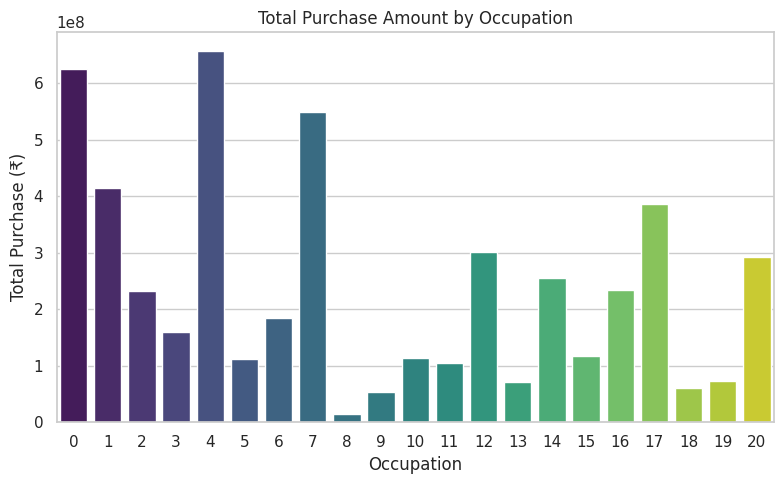

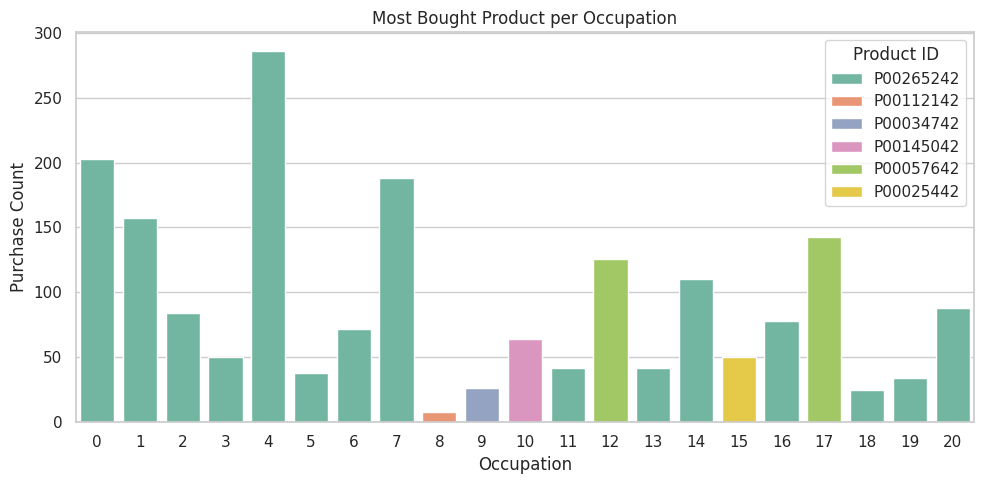

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1. Total Purchase by Occupation
plt.figure(figsize=(8, 5))
sns.barplot(x=occupation_purchase.index, y=occupation_purchase.values, palette='viridis')
plt.title("Total Purchase Amount by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Total Purchase (₹)")
plt.tight_layout()
plt.show()

# 2. Most Common Product per Occupation (Count Bar)
plt.figure(figsize=(10, 5))
sns.barplot(data=top_products_by_occupation, x='Occupation', y='Count', hue='Product_ID', dodge=False, palette='Set2')
plt.title("Most Bought Product per Occupation")
plt.xlabel("Occupation")
plt.ylabel("Purchase Count")
plt.legend(title='Product ID')
plt.tight_layout()
plt.show()



In [69]:
# Save insights to CSV
occupation_purchase.to_csv("occupation_total_purchase.csv")
top_products_by_occupation.to_csv("top_products_per_occupation.csv", index=False)
